# Lesson 1 Assignment - EnergyLoads
## Author - Kaza Razat

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

In [5]:
energy_data = pd.read_csv(fileName)
print (energy_data.columns)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')


### Summary statistics

Using pandas features like head, dtypes, describe and some initial histograms to get a better feel for the data.

In [6]:
print(energy_data.dtypes)

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object


In [7]:
energy_data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
energy_data.head(10)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [9]:
energy_data.tail(10)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
758,0.66,759.5,318.5,220.5,3.5,4,0.4,5,14.92,17.55
759,0.66,759.5,318.5,220.5,3.5,5,0.4,5,15.16,18.06
760,0.64,784.0,343.0,220.5,3.5,2,0.4,5,17.69,20.82
761,0.64,784.0,343.0,220.5,3.5,3,0.4,5,18.19,20.21
762,0.64,784.0,343.0,220.5,3.5,4,0.4,5,18.16,20.71
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


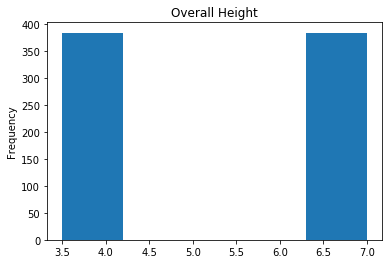

In [10]:
energy_data.loc[:,'Overall Height'].plot.hist(bins = 5, title="Overall Height")

### Observation
The Overall Height values are evenly distributed and given a rational that building height could<br>be a factor in its energy load I intend to create categorical data using these values to explore the possible relationship.

In [11]:
# Create a new column of categories based on the values of the Overall Height data
height_categories = []
for i in energy_data.loc[:,"Overall Height"]:
    if i == 7.0: 
        height_categories.append("taller")
    elif i == 3.5:
        height_categories.append("shorter")
    else:
        height_categories.append("unknown")
        
energy_data["Building Height"] = height_categories

### Overall Height to Cooling Load Relationship
From this observation using a box plot it initially appears as if the taller buildings have the higher cooling loads

(0.0, 50.0)

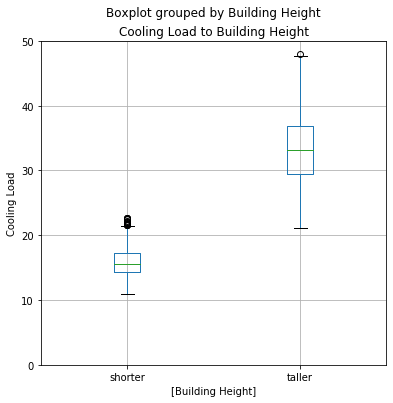

In [12]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
energy_data.loc[:,['Cooling Load','Building Height']].boxplot(by = 'Building Height', ax = ax)
ax.set_title('Cooling Load to Building Height') # Give the plot a main title
ax.set_ylabel('Cooling Load')# Set text for y axis 
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis

### Overall Height to Heating Load Relationship
From this observation using a box plot it also appears that the taller buildings have the higher heating loads

(0.0, 50.0)

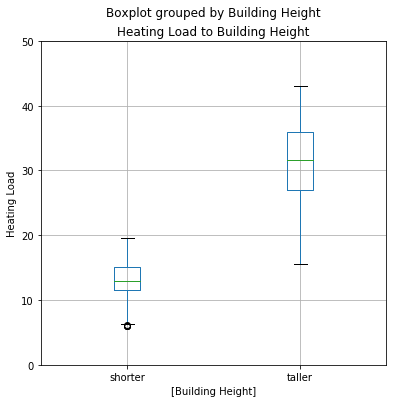

In [13]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
energy_data.loc[:,['Heating Load','Building Height']].boxplot(by = 'Building Height', ax = ax)
ax.set_title('Heating Load to Building Height') # Give the plot a main title
ax.set_ylabel('Heating Load')# Set text for y axis
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis

### Cooling and Heating Loads Have Similar Distribution
Using an overlay of kernal density plots we can observe that the distributions of cooling and heating loads are very similar across all the buildings. 

Text(0, 0.5, 'Density')

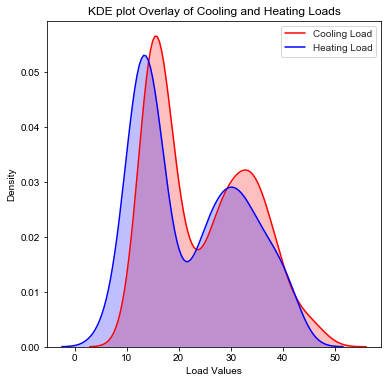

In [14]:
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
ax = sns.kdeplot(energy_data.loc[:, 'Cooling Load'], shade=True, color="r")
ax = sns.kdeplot(energy_data.loc[:, 'Heating Load'], shade=True, color="b")
ax.set_title('KDE plot Overlay of Cooling and Heating Loads') # Give the plot a main title
ax.set_xlabel('Load Values') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

### EDA Conclusions
**1.) There is a relationship between the Overall Height of a building and the Cooling Load.**<br>
**2.) There is a relationship between the Overall Height of a building and the Heating Load.**<br>
**3.) The distributions of Cooling Load and Heating Load are very similar indicating some correlation.**
